Dataset saved to classification_data.csv
Classification Model Evaluation:
Accuracy: 0.92
Precision: 0.69
Recall: 0.69
F1 Score: 0.69


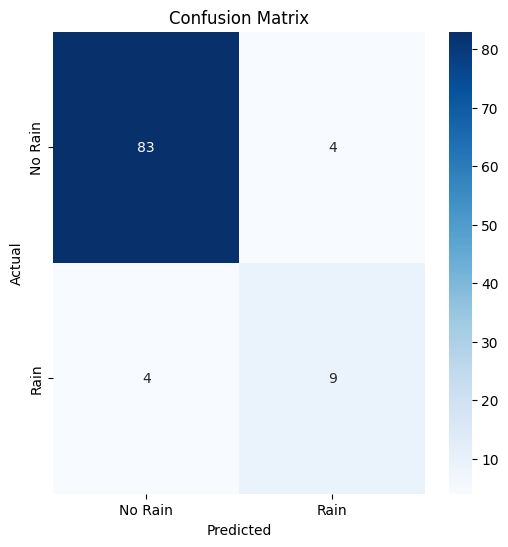

Classification Report:
              precision    recall  f1-score   support

     No Rain       0.95      0.95      0.95        87
        Rain       0.69      0.69      0.69        13

    accuracy                           0.92       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.92      0.92      0.92       100



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

# Set random seed for reproducibility
np.random.seed(42)

# Define dataset size
num_samples = 500

# Generate synthetic weather data
temperature = np.random.uniform(15, 40, num_samples)  # Temperature in °C
humidity = np.random.uniform(20, 100, num_samples)    # Humidity in percentage
wind_speed = np.random.uniform(0, 25, num_samples)    # Wind Speed in km/h
cloud_cover = np.random.uniform(0, 100, num_samples)  # Cloud Cover in percentage

# Generate 'Rain' as target variable (0 for no rain, 1 for rain)
# Rain is more likely if Humidity > 70 and CloudCover > 50
rain = (humidity > 70) & (cloud_cover > 50)
rain = rain.astype(int)

# Create a DataFrame
weather_data = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'WindSpeed': wind_speed,
    'CloudCover': cloud_cover,
    'Rain': rain
})

# Save dataset to CSV
file_path = "classification_data.csv"
weather_data.to_csv(file_path, index=False)
print(f"Dataset saved to {file_path}")

# Display first few rows
weather_data.head()

# Load dataset
weather_data = pd.read_csv("classification_data.csv")

# Prepare the data
X = weather_data[['Temperature', 'Humidity', 'WindSpeed', 'CloudCover']]  # Features
y = weather_data['Rain']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
print("Classification Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["No Rain", "Rain"])
print("Classification Report:")
print(report)